In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
cv2.destroyAllWindows()

In [4]:
def showImages(images, titles):
    for i, image in enumerate(images):
        cv2.imshow(titles[i], image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Exercício 2.1

In [5]:
object_image = cv2.imread("imageDatabase/falcon.jpg")
mask = cv2.imread("imageDatabase/mask.png")
background = cv2.imread("imageDatabase/florest.jpg")

showImages([object_image, mask, background], ["object_image", "mask", "background"])

In [6]:
mask[mask == 255] = 1

i_mask = np.zeros_like(mask)
i_mask[mask == 0] = 1

objmask = cv2.multiply(object_image, mask)

backMask = cv2.multiply(background, i_mask)

imageOut = cv2.add(objmask, backMask)

showImages([objmask, backMask, imageOut], ["object * mask", "background * i_mask", "imageOut"])

### Exercício 2.3

In [7]:
normal_image = imageOut
height, width, _ = normal_image.shape
center = (width//2, height//2)

rotMatrix = cv2.getRotationMatrix2D(center, 180, 1)
print(rotMatrix)

rotated_image = cv2.warpAffine(normal_image, rotMatrix, (width, height))

showImages([normal_image, rotated_image], ["normal image", "rotated image"])

[[-1.0000000e+00  1.2246468e-16  4.0000000e+02]
 [-1.2246468e-16 -1.0000000e+00  5.0000000e+02]]


### Exercício 3.1

(720, 1280)
(256,)


<BarContainer object of 256 artists>

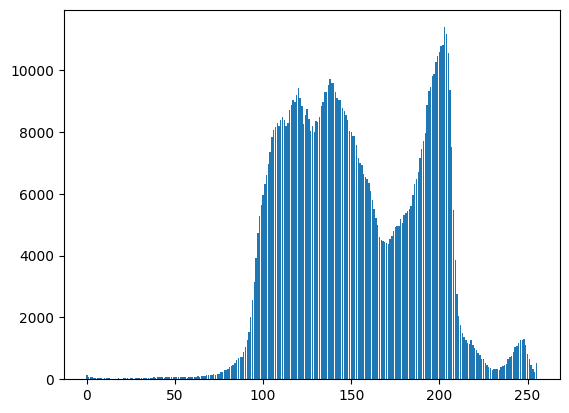

In [8]:
image_gs = cv2.imread("imageDatabase/jet.jpg")
image_gs = cv2.cvtColor(image_gs, cv2.COLOR_BGR2GRAY)
print(image_gs.shape)

hist = cv2.calcHist([image_gs], [0], None, [256], [0, 256])
hist = hist.flatten()
print(hist.shape)

plt.bar(np.arange(len(hist)), hist)

### Exercício 3.2

In [9]:
ret1, image_bw = cv2.threshold(image_gs, 180, 255, cv2.THRESH_BINARY)
ret2, image_bw_otsu = cv2.threshold(image_gs, 0, 255, cv2.THRESH_OTSU)
image_bw_adaptive = cv2.adaptiveThreshold(image_gs, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 4)

print(ret1)
print(ret2)

showImages([image_bw, image_bw_otsu, image_bw_adaptive], ["image_bw - thr = "+str(ret1), "image_bw_otsu - thr = "+str(ret2), "image_bw_adaptive"])

180.0
159.0


### Exercício 3.4

In [23]:
test_img = cv2.imread("imageDatabase/ImTest1.jpg")
test_img_gs = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
ret, test_img_bw = cv2.threshold(test_img_gs, 127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(test_img_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_img = np.zeros_like(test_img_bw)
contour_img = cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 2)
# showImages([contour_img], ["contour image"])

total_labels, labels_id, stats, centroid = cv2.connectedComponentsWithStats(test_img_bw)
print(total_labels)
print(labels_id.shape)
print(["left", "top", "width", "height", "area"])
print(stats)
print(centroid.shape)

7
(400, 640)
['left', 'top', 'width', 'height', 'area']
[[    46     36    449    339  46262]
 [     0      0    640    400 175523]
 [    91     60    103    132   9389]
 [   328     65    150    128  11383]
 [   373     88     56     74   2286]
 [   197    253    178    104  10470]
 [   261    307     47     20    687]]
(7, 2)
